# LISTA 3

In [1]:
#pip install scikeras==0.12.0

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Montagem do google drive


In [3]:
#montagem do drive
#drive.mount('/content/drive')


#diretorio = '/content/drive/MyDrive/data/IA_2024/'
diretorio = r'D:\Projetos\Mestrado\2024_Sistemas_Embarcados\ai_data'+ '\\'

### Importa arquivos excel

In [4]:
# deitado
df_dl = pd.read_excel(diretorio + 'DeitadoLeve.xls')
df_dm = pd.read_excel(diretorio + 'DeitadoModerado.xls')
df_dv = pd.read_excel(diretorio + 'DeitadoVigoroso.xls')

deitado_df = pd.concat([df_dl, df_dm, df_dv])

# sentado
df_sl = pd.read_excel(diretorio + 'SentadoLeve.xls')
df_sm = pd.read_excel(diretorio + 'SentadoModerado.xls')
df_sv = pd.read_excel(diretorio + 'SentadoVigoroso.xls')

sentado_df = pd.concat([df_sl, df_sm, df_sv])

#andando
df_al = pd.read_excel(diretorio + 'AndandoLeve.xls')
df_am = pd.read_excel(diretorio + 'AndandoModerado.xls')
df_av = pd.read_excel(diretorio + 'AndandoVigoroso.xls')

andando_df = pd.concat([df_al, df_am, df_av])

all_df = pd.concat([deitado_df, sentado_df, andando_df])

#remove coluna 
all_df.drop(columns=['actime'], inplace=True)

### Processamento dos dados e treino do modelo

In [5]:
# Pré-processamento dos dados
def preprocess_data(df):
    # Codificar a coluna 'acaction'
    label_encoder = LabelEncoder()
    df['acaction_encoded'] = label_encoder.fit_transform(df['acaction'])

    # Separar os dados em features e target
    X = df[['acx', 'acy', 'acz']].values
    y = df['acaction_encoded'].values

    return X, y, label_encoder.classes_

# Definir e treinar o modelo denso
def train_dense(X_train, y_train, num_classes):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, to_categorical(y_train), epochs=20, batch_size=32)

    return model

# Função para prever a ação
def predict_action(model, data_point, classes):
    data_point = np.array(data_point).reshape(1, -1)
    prediction = model.predict(data_point)
    predicted_class = classes[np.argmax(prediction)]
    return predicted_class


X, y, classes = preprocess_data(all_df)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo denso
model = train_dense(X_train, y_train, len(classes))

# Avaliar o modelo
loss, model_accuracy = model.evaluate(X_test, to_categorical(y_test))
print("Loss:", loss)
print("Accuracy:", model_accuracy)

# Testar o modelo com uma entrada de exemplo
data_point = [0.1, 0.2, 0.3]  # Exemplo de dados de entrada (substitua pelos seus dados)
predicted_action = predict_action(model, data_point, classes)
print("Predicted Action:", predicted_action)






Epoch 1/20


5921/5921 [==============================] - 5s 723us/step - loss: 0.6814 - accuracy: 0.7378
Epoch 2/20
5921/5921 [==============================] - 4s 723us/step - loss: 0.5456 - accuracy: 0.7890
Epoch 3/20
5921/5921 [==============================] - 4s 722us/step - loss: 0.5229 - accuracy: 0.7979
Epoch 4/20
5921/5921 [==============================] - 4s 716us/step - loss: 0.5122 - accuracy: 0.8025
Epoch 5/20
5921/5921 [==============================] - 5s 764us/step - loss: 0.5050 - accuracy: 0.8045
Epoch 6/20
5921/5921 [==============================] - 4s 714us/step - loss: 0.4982 - accuracy: 0.8068
Epoch 7/20
5921/5921 [==============================] - 4s 725us/step - loss: 0.4934 - accuracy: 0.8079
Epoch 8/20
5921/5921 [==============================] - 4s 720us/step - loss: 0.4892 - accuracy: 0.8090
Epoch 9/20
5921/5921 [==============================] - 5s 770us/step - loss: 0.4852 - accuracy: 0.8104
Epoch 10/20
5921/5921 [==============================] - 4s 

1481/1481 [==============================] - 1s 596us/step


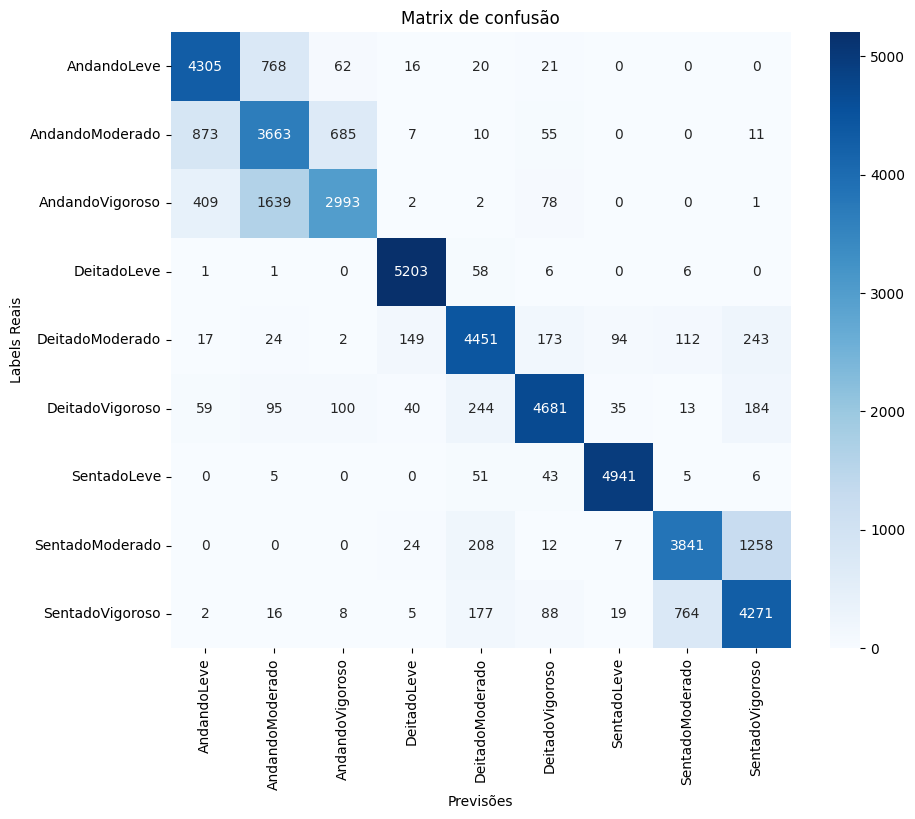

In [8]:
# Plotar matriz de confusão como mapa de calor
y_pred = np.argmax(model.predict(X_test), axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Previsões')
plt.ylabel('Labels Reais')
plt.title('Matrix de confusão')
plt.show()


In [9]:

# Calcular acurácia
model_accuracy = accuracy_score(y_test, y_pred)
print('Acurácia :{}%'.format(round(100*model_accuracy, 2)))

Acurácia :80.97%


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 9)                 585       
                                                                 
Total params: 5001 (19.54 KB)
Trainable params: 5001 (19.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:

# Definir o nome do arquivo do modelo TensorFlow Lite
TF_LITE_MODEL_FILE_NAME = diretorio + 'rah_model.tflite'

# Converter o modelo para o formato TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter._experimental_lower_tensor_list_ops = False

tflite_model = converter.convert()

# Salvar o modelo convertido em um arquivo
with open(TF_LITE_MODEL_FILE_NAME, "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\lauro\AppData\Local\Temp\tmpug4rr850\assets


INFO:tensorflow:Assets written to: C:\Users\lauro\AppData\Local\Temp\tmpug4rr850\assets


In [13]:
# Função para prever a ação com o modelo TensorFlow Lite
def predict_action_tflite(interpreter, data_point, classes):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.allocate_tensors()

    # Preprocessar a entrada
    data_point = np.array(data_point, dtype=np.float32).reshape(1, 3)

    # Colocar os dados de entrada no tensor de entrada
    interpreter.set_tensor(input_details[0]['index'], data_point)

    # Executar a inferência
    interpreter.invoke()

    # Obter os resultados
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_class = classes[np.argmax(output_data)]
    return predicted_class



# Carregar o modelo TensorFlow Lite
interpreter = tf.lite.Interpreter(model_path=TF_LITE_MODEL_FILE_NAME)


# Testar o modelo TensorFlow Lite com a mesma entrada de exemplo
predicted_action_tflite = predict_action_tflite(interpreter, data_point, classes)
print("Predicted Action with TensorFlow Lite model:", predicted_action_tflite)


Predicted Action with TensorFlow Lite model: DeitadoVigoroso
